In [59]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [64]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# feature scaling

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [57]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [10]:
class_names[y_train[2]]

'Sneaker'

Sequential model. This is the simplest kind of Keras
model, for neural networks that are just composed of a single stack of layers,

Flatten layer whose
role is simply to convert each input image into a 1D array:

Next we add a Dense hidden layer with 300 neurons.


Next we add a Dense hidden layer with 100 neurons.


add a Dense output layer with 10 neurons (one per class), using the
softmax activation function (because the classes are exclusive)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
weights = model.get_weights()
first_layer_weights = model.layers[1].get_weights()[0]
first_layer_weights

array([[ 0.04393869,  0.04242778,  0.05314867, ..., -0.02556527,
         0.06319816, -0.04637037],
       [ 0.04551245, -0.06718592,  0.00711769, ..., -0.00749703,
         0.06522079, -0.06271438],
       [ 0.03490724, -0.00145883, -0.03557419, ..., -0.06726831,
        -0.01603287,  0.00546205],
       ...,
       [-0.04276024, -0.04516884, -0.03892022, ..., -0.05024994,
        -0.0057717 , -0.01050854],
       [ 0.05797693,  0.03502213,  0.00184662, ..., -0.00383647,
         0.04066419,  0.02974108],
       [-0.04388457, -0.05436594, -0.05423509, ..., -0.02159255,
        -0.02911128, -0.02918595]], dtype=float32)

In [36]:
first_layer_weights

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Train network

In [39]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

In [42]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7290 - accuracy: 0.7620 - val_loss: 0.5599 - val_accuracy: 0.8014
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4897 - accuracy: 0.8296 - val_loss: 0.4457 - val_accuracy: 0.8472
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4443 - accuracy: 0.8447 - val_loss: 0.4226 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4163 - accuracy: 0.8549 - val_loss: 0.3992 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3956 - accuracy: 0.8614 - val_loss: 0.3771 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3794 - accuracy: 0.8667 - val_loss: 0.3967 - val_accuracy: 0.8628
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3658 - accuracy: 0.8705 - val_loss: 0.3740 - val_accuracy:

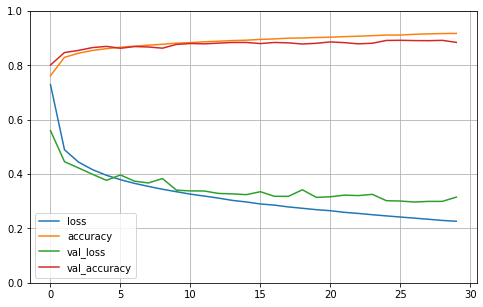

In [45]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [46]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 55.2763 - accuracy: 0.8582


[55.27629470825195, 0.8582000136375427]

In [55]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(3)

1/1 [==============================] - 0s 16ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [54]:
y_pred = y_proba.argmax(axis=-1)

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')